# Question 1: Homogeneous and Non-Homogeneous Poisson Process

(i) Write code to generate spikes using a Poisson process and sample a
homogeneous Poisson spike train with firing rate of 35 Hz.

31
Homogeneous Spike times (in seconds): [0.01400358 0.10547878 0.17202823 0.1924741  0.2138673  0.22926691
 0.25876068 0.2683526  0.27657338 0.29214612 0.29959493 0.30243433
 0.33298554 0.34698009 0.35402535 0.38558872 0.38560497 0.41421469
 0.41741137 0.49629089 0.51479835 0.72638665 0.74129324 0.77092576
 0.78170475 0.83433012 0.85907473 0.86282822 0.91150638 0.92801516
 0.93472657]


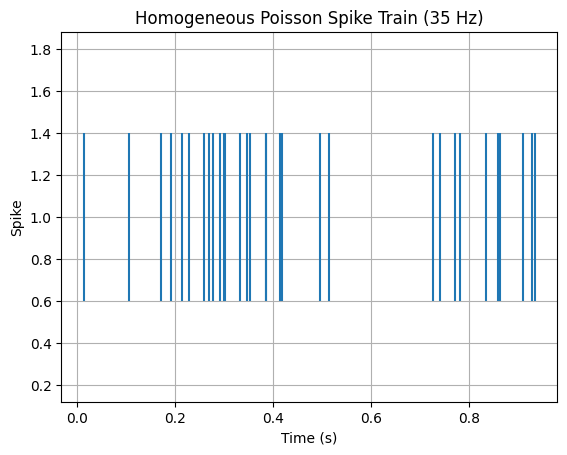

In [127]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

#### HOMOGENEOUS POISSON ####

firing_rate = 35
total_time = 1 #in seconds

n_spikes = int(firing_rate * total_time)
isis = np.random.exponential(scale=1 / firing_rate, size=n_spikes)
spike_times = np.cumsum(isis)

spike_times = spike_times[spike_times < total_time] #filter out spikes that exceed the total time
print(len(spike_times))
print("Homogeneous Spike times (in seconds):", spike_times)
plt.eventplot(spike_times, orientation='horizontal', linelengths=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.title('Homogeneous Poisson Spike Train (35 Hz)')
plt.grid()
plt.show()

(ii) Extend your code to sample from an inhomogeneous Poisson neuron
that has a 5 ms absolute refractory period, keeping the overall firing
rate at 35 Hz (35 spikes per second).

34
Inhomogeneous Spike times (in seconds): [0.035301186973843934, 0.06096198997040747, 0.09065552220631559, 0.1294927841784697, 0.152827777011045, 0.2424711514733884, 0.24770936694653928, 0.26479779901236594, 0.3044309276769299, 0.3096942254653755, 0.3385477174207875, 0.35362160110735147, 0.36490581618436263, 0.39373167876037124, 0.44066544058140805, 0.4526491718419884, 0.49381179843736467, 0.5052088306471645, 0.5318757189191052, 0.5430468839249697, 0.5655073978392459, 0.5725671336164717, 0.5809366015542748, 0.5867523247407185, 0.6106479282479578, 0.723542263831152, 0.7367605385741024, 0.8176884381955025, 0.8630391876729568, 0.8784319216533555, 0.8975908715120839, 0.9208727225648968, 0.9417707667942973, 0.9481619519767803]


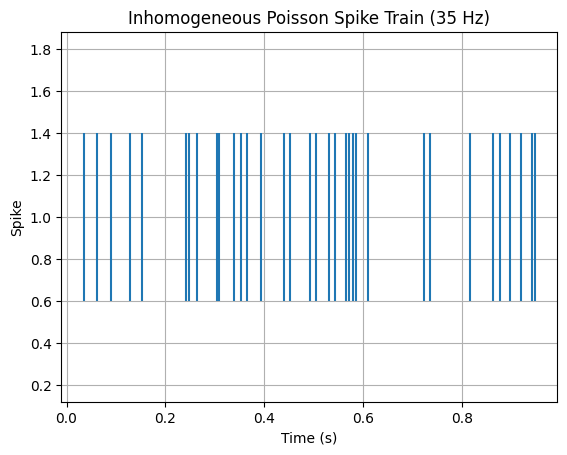

In [128]:
''' 5ms refractory period after each spike, same firing rate, same total time.
Therefore to keep the overall firing rate the same,
effective frequency is higher to take account of the neuron behaviour.
We simply remove spike timings that "disturbs" the refractory period.
'''

#### INHOMOGENEOUS POISSON ####

refractory_period = 0.005 #5ms
lambda_effective = firing_rate / (1 - firing_rate * refractory_period)
n_spikes = int(lambda_effective * total_time) 
isis_inhomogeneous = np.random.exponential(scale=1 / lambda_effective, size=n_spikes)

''' idea is to add refractory period after each isi to get the spike times'''
time_stamp = 0
spike_times_inhom = []
for spike_t in isis_inhomogeneous:
    time_stamp += spike_t
    if time_stamp > total_time:
        break
    spike_times_inhom.append(time_stamp)
    time_stamp += refractory_period

print(len(spike_times_inhom))
print("Inhomogeneous Spike times (in seconds):", spike_times_inhom)
plt.eventplot(spike_times_inhom, orientation='horizontal', linelengths=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.title('Inhomogeneous Poisson Spike Train (35 Hz)')
plt.grid()
plt.show()


(iii) Calculate the spike-count Fano factor and ISI coefficient of variation
for the homogeneous and refractory-inhomogeneous neurons sam-
pled in parts i and ii. In the case of the Fano factor the count should be
performed over windows of width 10 ms, 50 ms and 100 ms.

In [122]:
time_bins = [0.01, 0.05, 0.1]  # 10 ms, 50 ms, 100 ms

def compute_fano_factor(spike_times, bin_width):
    bins = np.arange(0, total_time + bin_width, bin_width)
    spike_counts, _ = np.histogram(spike_times, bins)
    variance = np.var(spike_counts, ddof=1)  #sample variance to take account of small size
    mean = np.mean(spike_counts)
    fano_factor = variance / mean if mean > 0 else 0
    return fano_factor

def compute_cv(isis):
    ave = np.mean(isis)
    var = np.var(isis, ddof=1)
    return pow(var,0.5)/ave


# HOMOGENEOUS
for bin_width in time_bins:
    fano_hom = compute_fano_factor(spike_times, bin_width)
    print(f"Homogeneous Fano Factor (bin width {bin_width * 1000:.0f} ms): {fano_hom:.4f}")
cv_hom = compute_cv(isis)
print("Homogeneous CV: ", cv_hom)


# INHOMOGENEOUS
for bin_width in time_bins:
    fano_hom = compute_fano_factor(spike_times_inhom, bin_width)
    print(f"Inhomogeneous Fano Factor (bin width {bin_width * 1000:.0f} ms): {fano_hom:.4f}")
cv_inhom = compute_cv(isis_inhomogeneous)
print("Inhomogeneous CV: ", cv_inhom)


Homogeneous Fano Factor (bin width 10 ms): 1.1665
Homogeneous Fano Factor (bin width 50 ms): 1.2297
Homogeneous Fano Factor (bin width 100 ms): 2.3603
Homogeneous CV:  1.1478000459538884
Inhomogeneous Fano Factor (bin width 10 ms): 0.6869
Inhomogeneous Fano Factor (bin width 50 ms): 0.5526
Inhomogeneous Fano Factor (bin width 100 ms): 0.3333
Inhomogeneous CV:  0.7886985734558248


(iv) Plot how the ISI coefficient of variation and spike-count Fano factor in
100 ms bins change over refractory periods ranging from 0 to 28 mil-
liseconds. Include a descriptive figure title and a caption with enough
detail to understand the context of what is being plotted and the effect
that the figure is demonstrating.

Spike times (refractory period 0 ms): [0.0028721550088362576, 0.1325544471666876, 0.21553781559129453, 0.24889793692282072, 0.2815811673599861, 0.31471379136236577, 0.376821633722012, 0.3948895071662792, 0.46458526168628256, 0.47109162051804776, 0.5076074140865615, 0.524167542393656, 0.615137872462139, 0.6585122237621732, 0.6913768538044314, 0.7262020420740469, 0.7778325075158945, 0.7829358477493941, 0.7949377514867463, 0.8174097755720662, 0.8187993760365725, 0.8198465896257767, 0.8974149766744783, 0.9576458993961128, 0.9650047727691986, 0.9742634734798921]
[0.0028721550088362576, 0.1325544471666876, 0.21553781559129453, 0.24889793692282072, 0.2815811673599861, 0.31471379136236577, 0.376821633722012, 0.3948895071662792, 0.46458526168628256, 0.47109162051804776, 0.5076074140865615, 0.524167542393656, 0.615137872462139, 0.6585122237621732, 0.6913768538044314, 0.7262020420740469, 0.7778325075158945, 0.7829358477493941, 0.7949377514867463, 0.8174097755720662, 0.8187993760365725, 0.81984658

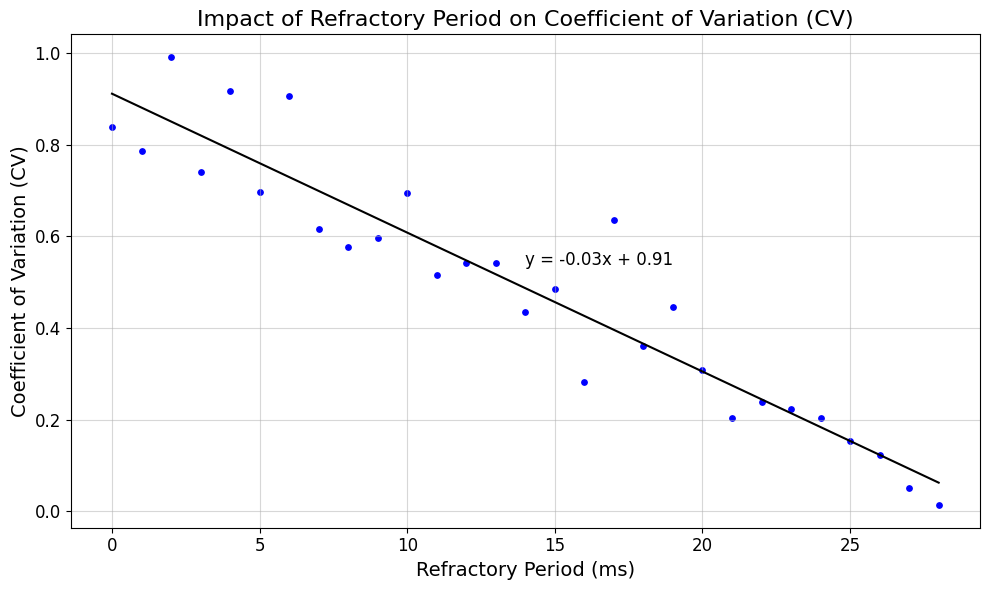

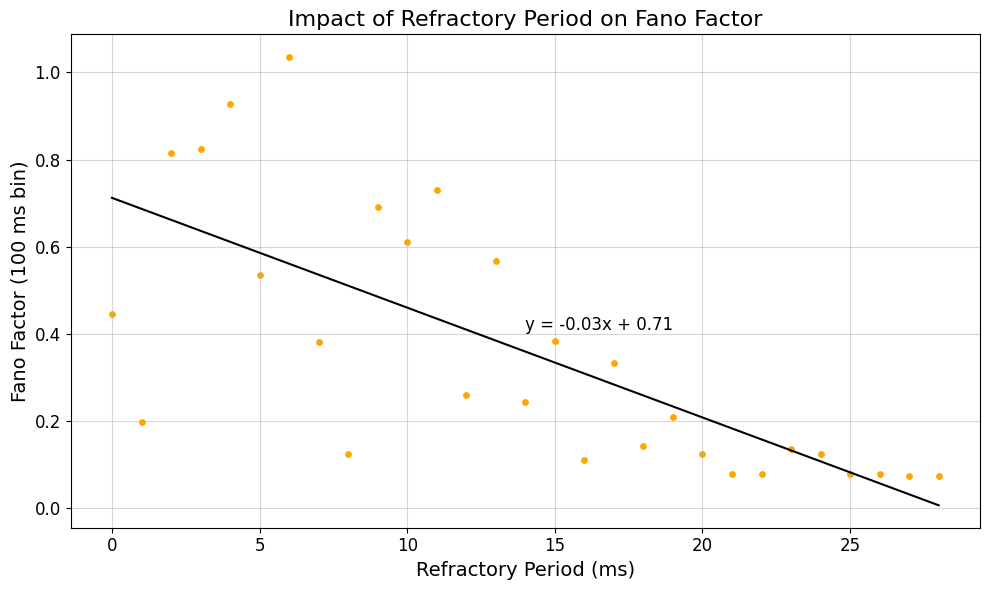

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


refractory_periods = np.arange(0, 0.029, 0.001)  # Refractory periods from 0 to 28 ms
cv_values = []
fano_factors = []

for refractory_period in refractory_periods:
    lambda_effective = firing_rate / (1 - firing_rate * refractory_period)
    n_spikes = int(lambda_effective * total_time) 
    isis_inhomogeneous = np.random.exponential(scale=1 / lambda_effective, size=n_spikes)

    ''' idea is to add refractory period after each isi to get the spike times'''
    time_stamp = 0
    spike_times_inhom = []
    for spike_t in isis_inhomogeneous:
        time_stamp += spike_t
        if time_stamp > total_time:
            break
        spike_times_inhom.append(time_stamp)
        time_stamp += refractory_period
    print(f"Spike times (refractory period {refractory_period* 1000:.0f} ms): {spike_times_inhom}")
    print(spike_times_inhom)
    isis = np.diff(spike_times_inhom)
    cv_values.append(compute_cv(isis))
    fano_factors.append(compute_fano_factor(spike_times_inhom, 0.1))  # 100 ms bin

# CV
slope_cv, intercept_cv, _, _, _ = linregress(refractory_periods * 1000, cv_values)
trend_cv = slope_cv * np.array(refractory_periods * 1000) + intercept_cv
plt.figure(figsize=(10, 6))
plt.scatter(refractory_periods * 1000, cv_values, color='blue',s=15, label="Coefficient of Variation (CV)")
plt.plot(refractory_periods * 1000, trend_cv, color='black', linestyle='-', label='Trend Line')
x_pos = (max(refractory_periods * 1000) + min(refractory_periods * 1000)) / 2 
y_pos = slope_cv * x_pos + intercept_cv  
equation_cv = f"y = {slope_cv:.2f}x + {intercept_cv:.2f}"
plt.text(x_pos, y_pos + 0.05, equation_cv, fontsize=12, color='black')

plt.xlabel("Refractory Period (ms)", fontsize=14)
plt.ylabel("Coefficient of Variation (CV)", fontsize=14)
plt.title("Impact of Refractory Period on Coefficient of Variation (CV)", fontsize=16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("cv_refractory_period_plot.png", dpi=300)
plt.show()

# FANO FACTOR
slope_fano, intercept_fano, _, _, _ = linregress(refractory_periods * 1000, fano_factors)
trend_fano = slope_fano * np.array(refractory_periods * 1000) + intercept_fano
plt.figure(figsize=(10, 6))
plt.scatter(refractory_periods * 1000, fano_factors, color='orange',s=15, label="Fano Factor (100 ms bin)")
plt.plot(refractory_periods * 1000, trend_fano, color='black', linestyle='-', label='Trend Line')
x_pos = (max(refractory_periods * 1000) + min(refractory_periods * 1000)) / 2 
y_pos = slope_fano * x_pos + intercept_fano  
equation_fano = f"y = {slope_fano:.2f}x + {intercept_fano:.2f}"
plt.text(x_pos, y_pos + 0.05, equation_fano, fontsize=12, color='black')
plt.xlabel("Refractory Period (ms)", fontsize=14)
plt.ylabel("Fano Factor (100 ms bin)", fontsize=14)
plt.title("Impact of Refractory Period on Fano Factor", fontsize=16)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("fano_refractory_period_plot.png", dpi=300)
plt.show()
